In [170]:
import numpy as np
import seaborn as sns
import pandas as pd
import plotly.express as px
from matplotlib import pyplot as plt

In [171]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [172]:
train.head()

,ID,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Af04604195,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
1,Af04794049,Afghanistan,2000,Developing,54.8,321.0,88,0.01,10.424960,62.0,6532,12.2,122,24.0,8.20,24.0,0.1,114.560000,293756.0,2.3,2.5,0.338,5.5
2,Af07527693,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,14.7,116,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1
3,Af11267444,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,16.7,102,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
4,Af12688448,Afghanistan,2005,Developing,57.3,291.0,85,0.02,1.388648,66.0,1296,14.2,118,58.0,8.70,58.0,0.1,25.294130,257798.0,19.3,19.5,0.396,7.9


In [173]:
test.head()

,ID,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Sy75324907,Syrian Arab Republic,2006,Developing,123.0,8,0.97,122.652333,83.0,517,48.5,10,83.0,3.78,8.0,0.1,1762.246170,18914977.0,6.4,6.3,0.636,11.4
1,Cr10129453,Croatia,2006,Developed,113.0,0,11.83,1555.651986,NaN,1,58.1,0,96.0,6.95,96.0,0.1,11363.418450,444.0,1.8,1.8,0.783,13.9
2,Mo67025598,Montenegro,2007,Developing,125.0,0,4.98,678.518894,9.0,0,57.2,0,92.0,6.74,92.0,0.1,5957.145693,615875.0,2.1,2.2,0.762,13.6
3,Ba38246112,Bahrain,2014,Developing,7.0,0,1.57,367.255674,98.0,46,62.9,0,98.0,4.98,98.0,0.1,24983.379200,NaN,6.1,6.0,0.820,14.5
4,Ke57254548,Kenya,2000,Developing,428.0,77,1.51,0.681686,NaN,21002,14.4,121,8.0,4.68,82.0,18.1,43.979713,3145483.0,9.2,9.1,0.448,8.4


In [174]:
train.shape, test.shape

((2350, 23), (588, 22))

In [175]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2350 entries, 0 to 2349
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               2350 non-null   object 
 1   Country                          2350 non-null   object 
 2   Year                             2350 non-null   int64  
 3   Status                           2350 non-null   object 
 4   Life expectancy                  2350 non-null   float64
 5   Adult Mortality                  2342 non-null   float64
 6   infant deaths                    2350 non-null   int64  
 7   Alcohol                          2192 non-null   float64
 8   percentage expenditure           2350 non-null   float64
 9   Hepatitis B                      1911 non-null   float64
 10  Measles                          2350 non-null   int64  
 11  BMI                              2323 non-null   float64
 12  under-five deaths   

In [176]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               588 non-null    object 
 1   Country                          588 non-null    object 
 2   Year                             588 non-null    int64  
 3   Status                           588 non-null    object 
 4   Adult Mortality                  586 non-null    float64
 5   infant deaths                    588 non-null    int64  
 6   Alcohol                          552 non-null    float64
 7   percentage expenditure           588 non-null    float64
 8   Hepatitis B                      474 non-null    float64
 9   Measles                          588 non-null    int64  
 10  BMI                              581 non-null    float64
 11  under-five deaths                588 non-null    int64  
 12  Polio                 

In [177]:
train.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2350.000000,2350.000000,2342.000000,2350.000000,2192.000000,2350.000000,1911.000000,2350.000000,2323.000000,2350.000000,2336.000000,2165.000000,2336.000000,2350.000000,2005.000000,1.834000e+03,2323.000000,2323.000000,2219.000000,2221.000000
mean,2007.537447,69.275404,165.824082,28.793191,4.593271,720.521353,81.141811,2318.703404,38.556780,40.094468,82.693921,5.936185,82.376712,1.787064,7384.623471,1.192254e+07,4.800215,4.838269,0.631084,12.028140
std,4.611986,9.573065,125.273598,111.836006,4.034828,1952.616462,24.821252,11589.618520,20.073857,152.939537,23.363327,2.509597,23.793441,5.266324,14189.942344,5.480387e+07,4.403585,4.482891,0.207573,3.346762
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.400000,0.000000,3.000000,0.650000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.300000,74.000000,0.000000,0.850000,5.491010,77.000000,0.000000,19.400000,0.000000,78.000000,4.260000,78.000000,0.100000,462.517913,1.943552e+05,1.600000,1.500000,0.497000,10.100000
50%,2008.000000,72.200000,144.000000,3.000000,3.760000,65.611455,92.000000,16.000000,43.900000,4.000000,93.000000,5.730000,93.000000,0.100000,1774.929100,1.416448e+06,3.300000,3.300000,0.682000,12.400000
75%,2012.000000,75.700000,227.750000,20.750000,7.622500,441.534144,97.000000,356.250000,56.200000,26.000000,97.000000,7.500000,97.000000,0.800000,5859.915622,7.442611e+06,7.100000,7.100000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.310000,19099.045060,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.240000,99.000000,50.600000,115761.577000,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [178]:
test.describe()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,588.000000,586.000000,588.000000,552.000000,588.000000,474.000000,588.000000,581.000000,588.000000,583.000000,547.000000,583.000000,588.000000,485.000000,4.520000e+02,581.00000,581.000000,552.000000,554.000000
mean,2007.443878,160.689420,36.341837,4.640942,809.110761,80.128692,2822.804422,37.379518,49.794218,81.974271,5.946124,82.113208,1.562415,7890.504183,1.612449e+07,4.99759,4.998451,0.613348,11.851083
std,4.624420,120.306158,139.587066,4.124987,2123.408651,26.060068,10964.956359,19.913699,187.414890,23.697065,2.455425,23.426808,4.240632,14604.993842,8.147891e+07,4.48635,4.613042,0.223427,3.406595
min,2000.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,1.000000,0.000000,3.000000,0.370000,3.000000,0.100000,3.685949,3.600000e+01,0.10000,0.100000,0.000000,0.000000
25%,2003.000000,69.000000,0.000000,0.950000,2.717652,76.000000,0.000000,18.800000,0.000000,77.000000,4.290000,77.000000,0.100000,465.119887,2.231182e+05,1.60000,1.500000,0.483750,9.900000
50%,2007.000000,141.000000,3.000000,3.725000,62.695106,92.000000,17.500000,41.400000,4.000000,93.000000,5.800000,93.000000,0.100000,1741.142552,1.323676e+06,3.50000,3.500000,0.656500,12.100000
75%,2011.000000,227.750000,26.250000,7.977500,432.321465,97.000000,372.750000,56.000000,36.250000,97.000000,7.465000,97.000000,0.800000,6256.559260,7.245294e+06,7.50000,7.400000,0.778500,14.175000
max,2015.000000,715.000000,1800.000000,17.870000,19479.911610,99.000000,131441.000000,79.300000,2400.000000,99.000000,17.600000,99.000000,43.500000,119172.741800,1.161978e+09,27.50000,28.500000,0.942000,20.600000


In [179]:
for i,j in zip(train.isna().sum(), train.columns):
    if i!=0:
        print(f"{j} column has {i} missinng values")

Adult Mortality column has 8 missinng values
Alcohol column has 158 missinng values
Hepatitis B column has 439 missinng values
BMI column has 27 missinng values
Polio column has 14 missinng values
Total expenditure column has 185 missinng values
Diphtheria column has 14 missinng values
GDP column has 345 missinng values
Population column has 516 missinng values
thinness  1-19 years column has 27 missinng values
thinness 5-9 years column has 27 missinng values
Income composition of resources column has 131 missinng values
Schooling column has 129 missinng values


In [180]:
for i,j in zip(test.isna().sum(), test.columns):
    if i!=0:
        print(f" {j} column has {i} missinng values")

 Adult Mortality column has 2 missinng values
 Alcohol column has 36 missinng values
 Hepatitis B column has 114 missinng values
 BMI column has 7 missinng values
 Polio column has 5 missinng values
 Total expenditure column has 41 missinng values
 Diphtheria column has 5 missinng values
 GDP column has 103 missinng values
 Population column has 136 missinng values
 thinness  1-19 years column has 7 missinng values
 thinness 5-9 years column has 7 missinng values
 Income composition of resources column has 36 missinng values
 Schooling column has 34 missinng values


In [181]:
for column in train.columns:
    if train[column].isnull().any():
        mean_value = train[column].mean()
        print(f"Mean value for '{column}' is {mean_value}")

Mean value for 'Adult Mortality' is 165.82408198121263
Mean value for 'Alcohol' is 4.59327098540146
Mean value for 'Hepatitis B' is 81.14181057038199
Mean value for 'BMI' is 38.55678002582867
Mean value for 'Polio' is 82.69392123287672
Mean value for 'Total expenditure' is 5.936184757505774
Mean value for 'Diphtheria' is 82.37671232876713
Mean value for 'GDP' is 7384.623471088378
Mean value for 'Population' is 11922543.676897492
Mean value for 'thinness  1-19 years' is 4.800215238915196
Mean value for 'thinness 5-9 years' is 4.838269479121825
Mean value for 'Income composition of resources' is 0.6310842721946823
Mean value for 'Schooling' is 12.028140477262495


In [182]:
for column in test.columns:
    if test[column].isnull().any():
        mean_value = test[column].mean()
        print(f"Mean value for '{column}' is {mean_value}")

Mean value for 'Adult Mortality' is 160.68941979522185
Mean value for 'Alcohol' is 4.640942028985507
Mean value for 'Hepatitis B' is 80.12869198312237
Mean value for 'BMI' is 37.37951807228916
Mean value for 'Polio' is 81.97427101200687
Mean value for 'Total expenditure' is 5.946124314442413
Mean value for 'Diphtheria' is 82.11320754716981
Mean value for 'GDP' is 7890.504182727011
Mean value for 'Population' is 16124492.081880532
Mean value for 'thinness  1-19 years' is 4.997590361445784
Mean value for 'thinness 5-9 years' is 4.998450946643717
Mean value for 'Income composition of resources' is 0.6133478260869565
Mean value for 'Schooling' is 11.851083032490974


In [183]:
for column in train.columns:
    if train[column].isnull().any():
        mean_value = train[column].mean()
        train[column].fillna(mean_value, inplace=True)

In [184]:
for column in test.columns:
    if test[column].isnull().any():
        mean_value =test[column].mean()
        test[column].fillna(mean_value, inplace=True)

In [185]:
categorical_columns =[]
for col in train.columns:
    if train[col].dtype == "object":
        categorical_columns.append(col)
        
categorical_columns

['ID', 'Country', 'Status']

In [186]:
categorical_columns =[]
for col in test.columns:
    if test[col].dtype == "object":
        categorical_columns.append(col)
        
categorical_columns

['ID', 'Country', 'Status']

In [187]:
train["Status"]=  pd.get_dummies(train["Status"])["Developed"]

In [188]:
test["Status"]= pd.get_dummies(test["Status"])["Developed"]

In [189]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()


train["Country"] =  encoder.fit_transform(train["Country"])

In [190]:
test["Country"] = encoder.fit_transform(test["Country"])

In [191]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_columns", None)

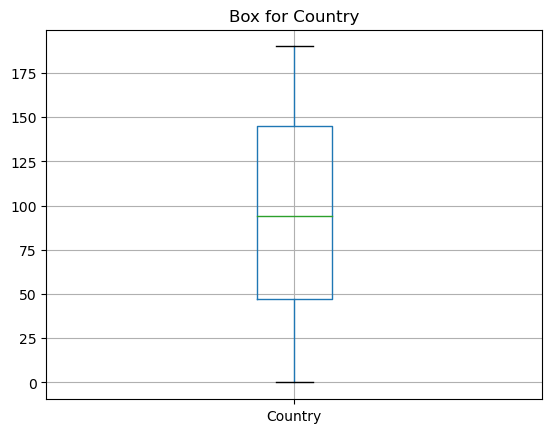

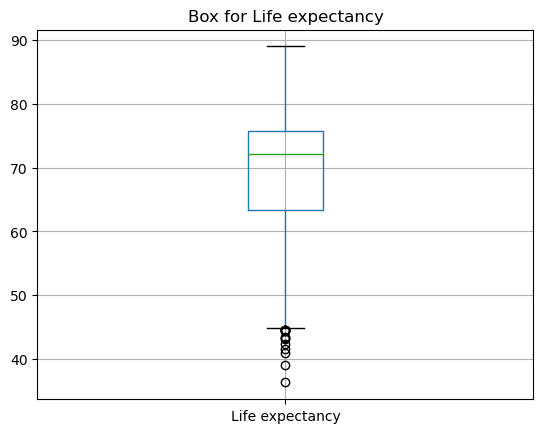

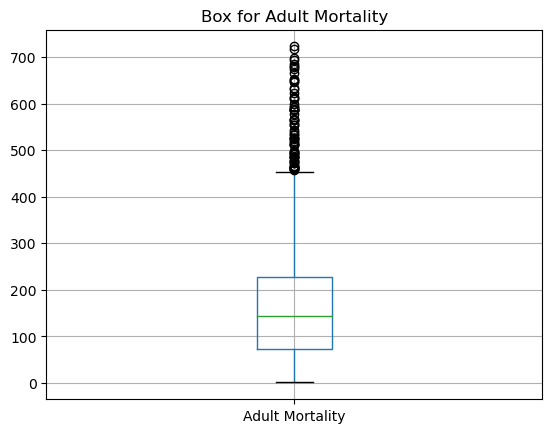

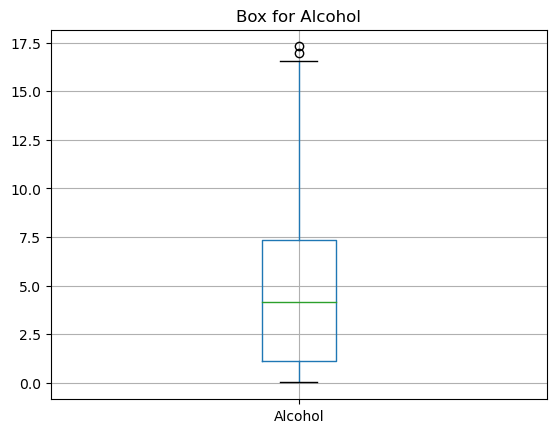

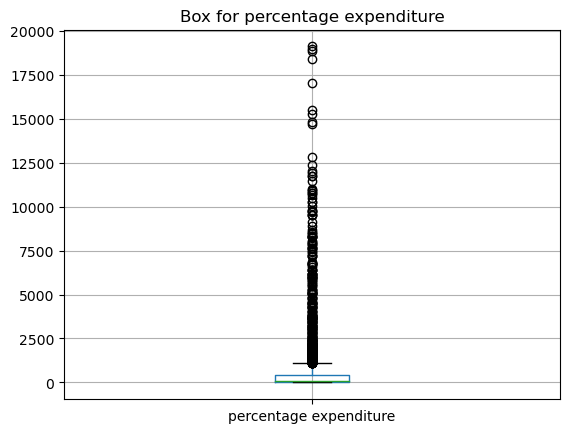

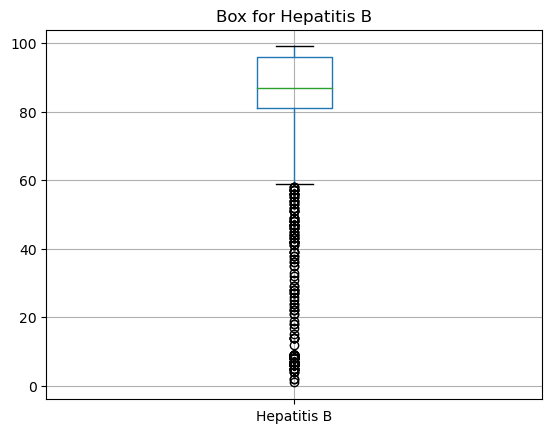

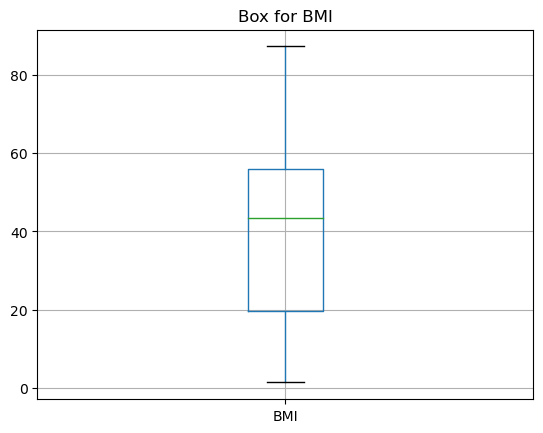

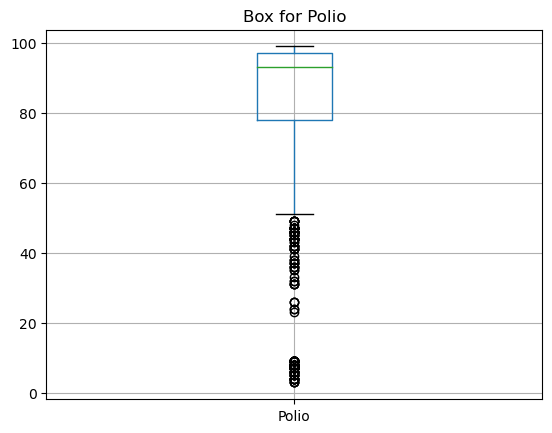

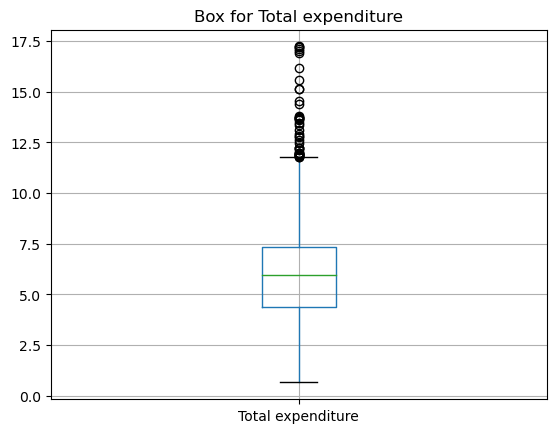

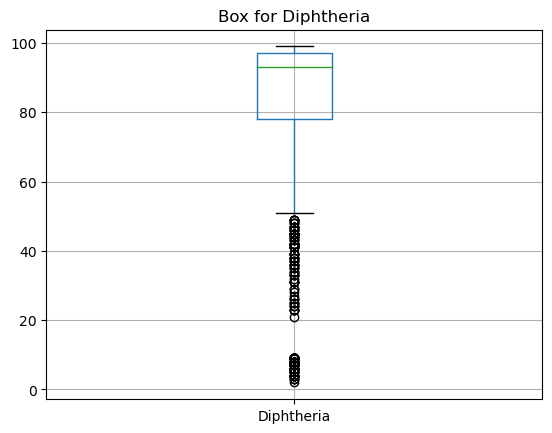

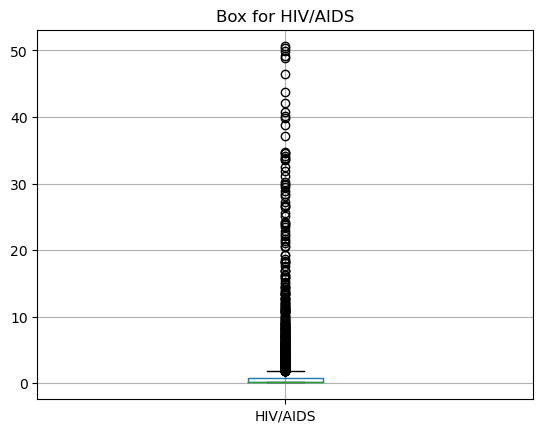

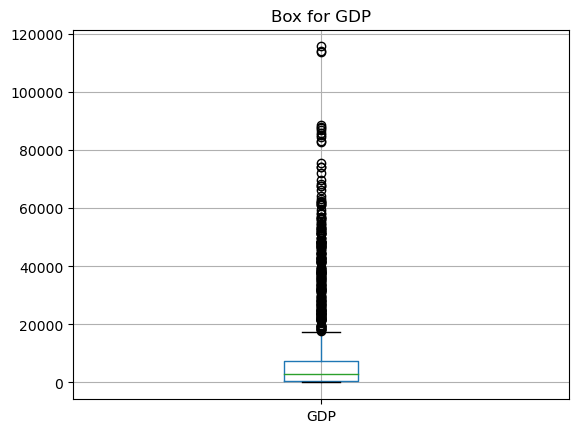

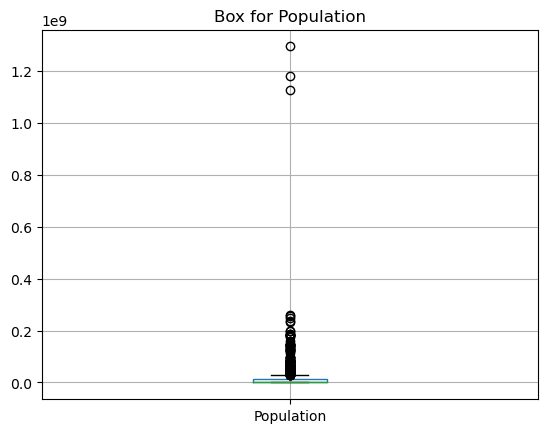

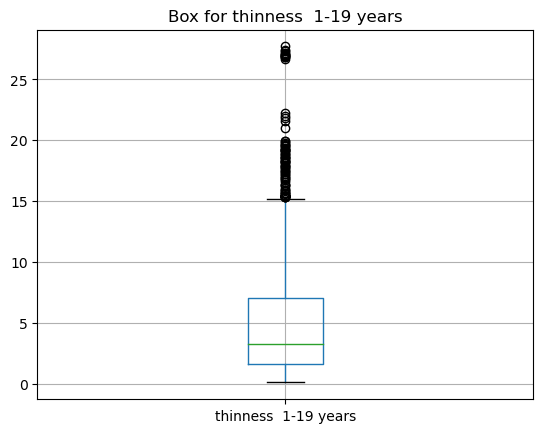

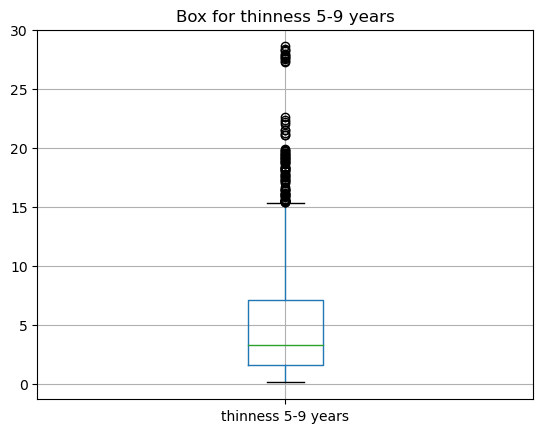

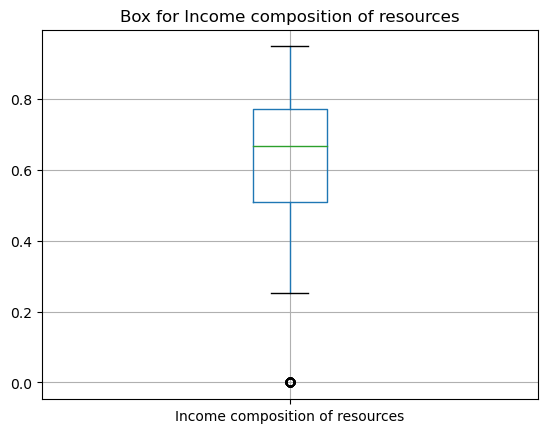

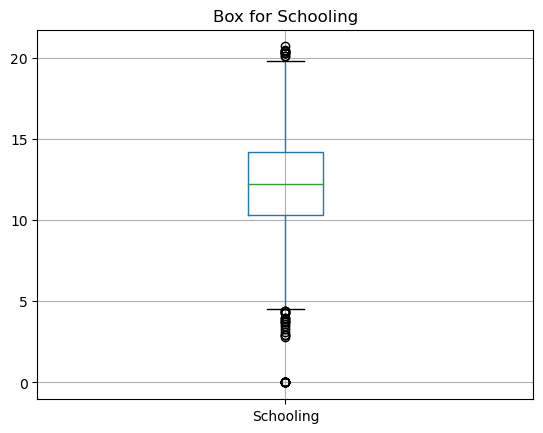

In [192]:
import matplotlib.pyplot as plt
for column in train.columns:
    if train[column].dtype in [int, float]:
        plt.figure()
        train.boxplot(column=column)
        plt.title(f"Box for {column}")
        plt.show

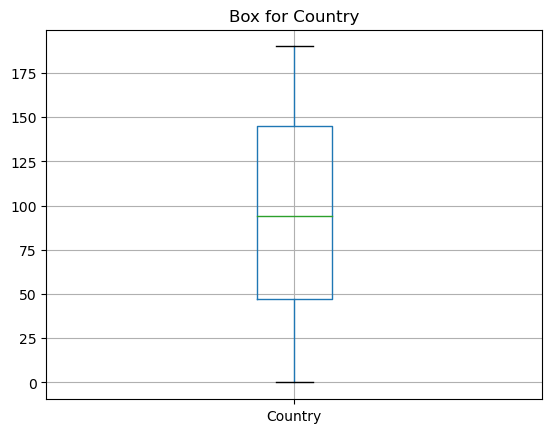

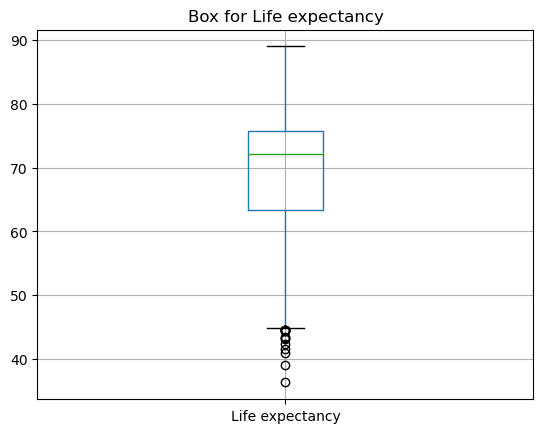

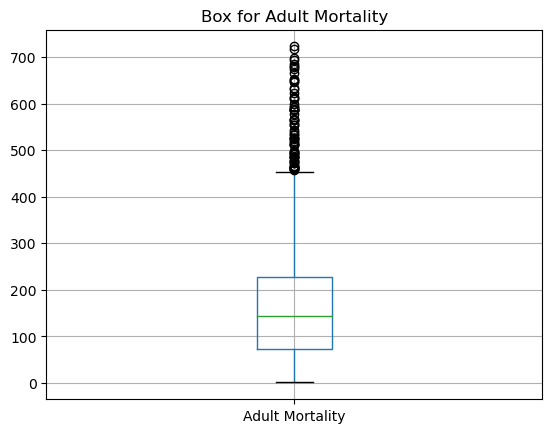

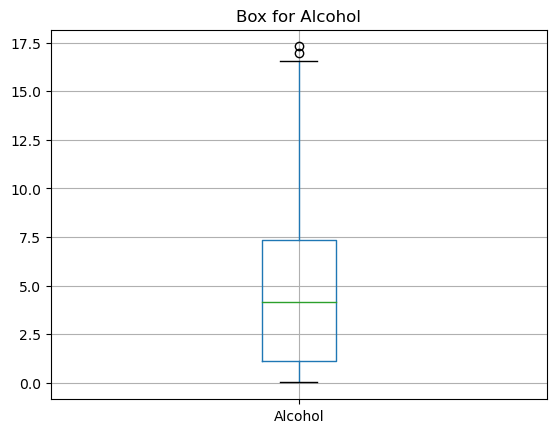

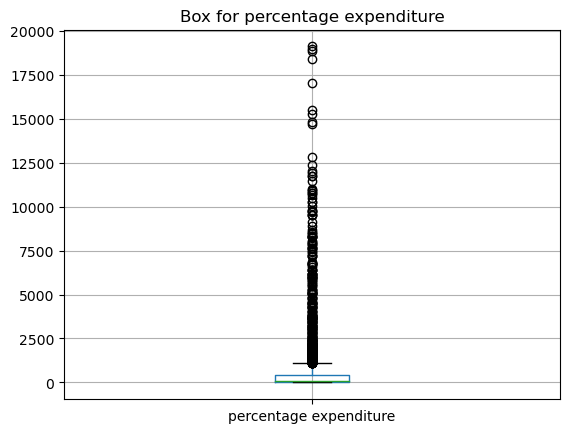

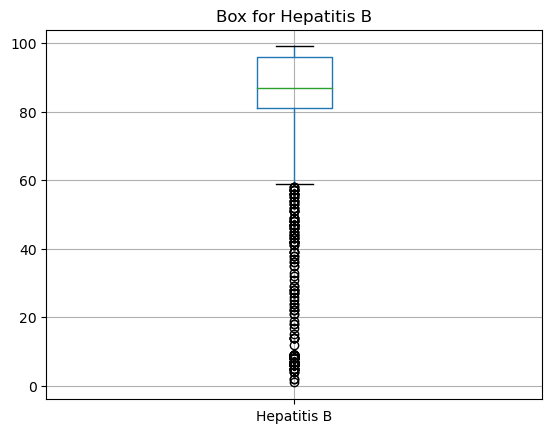

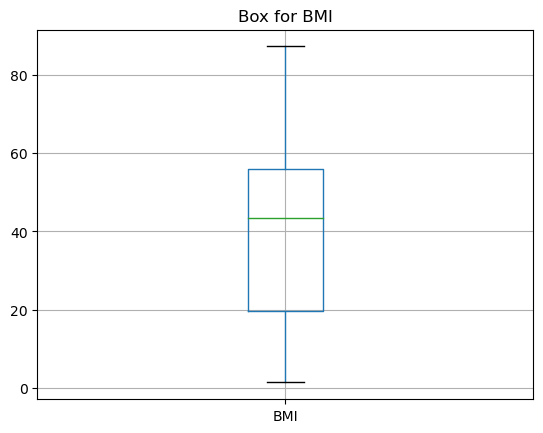

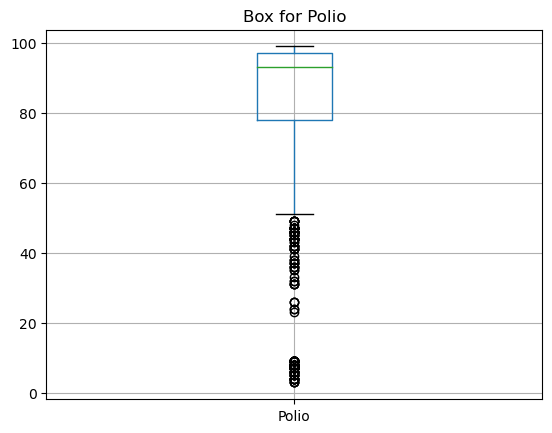

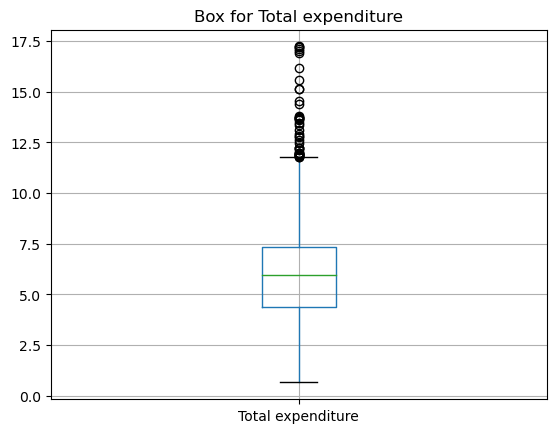

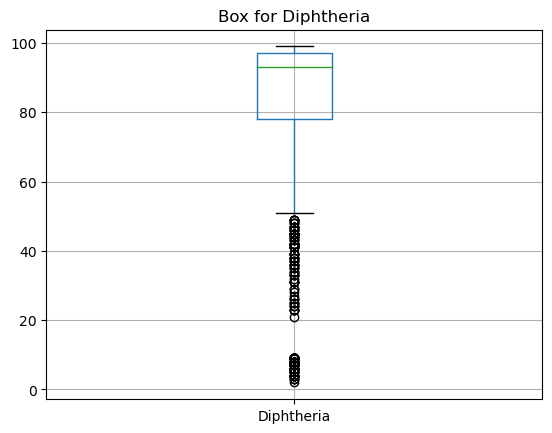

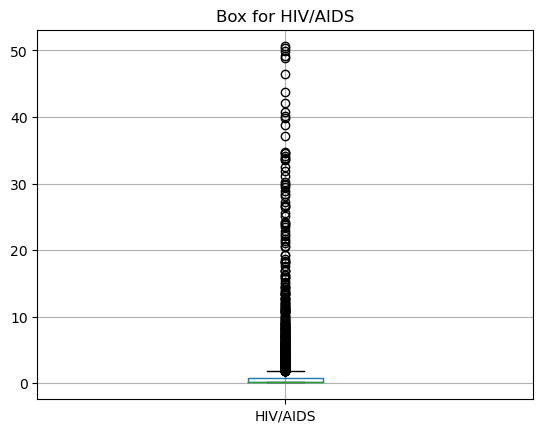

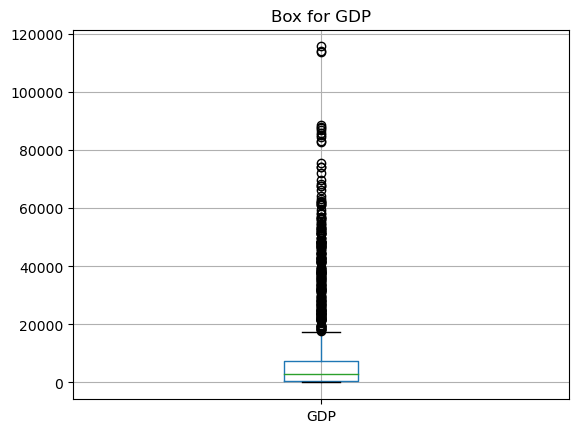

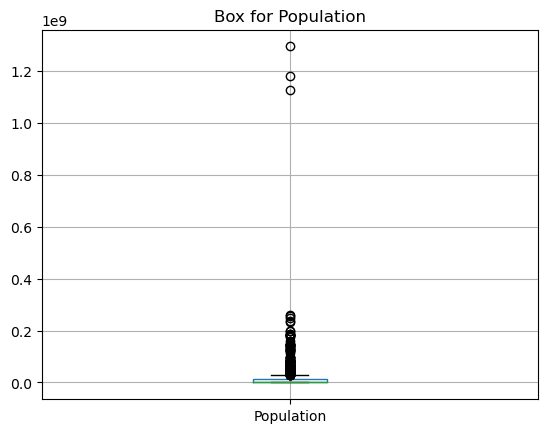

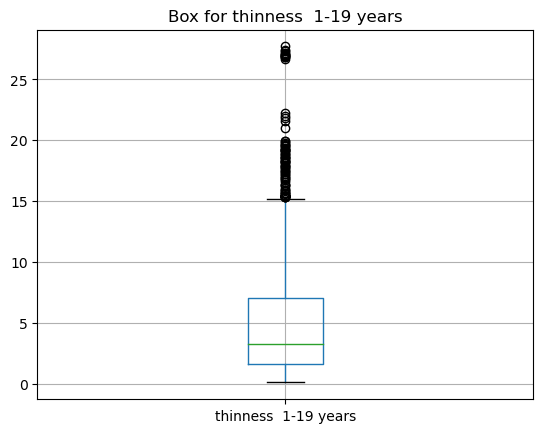

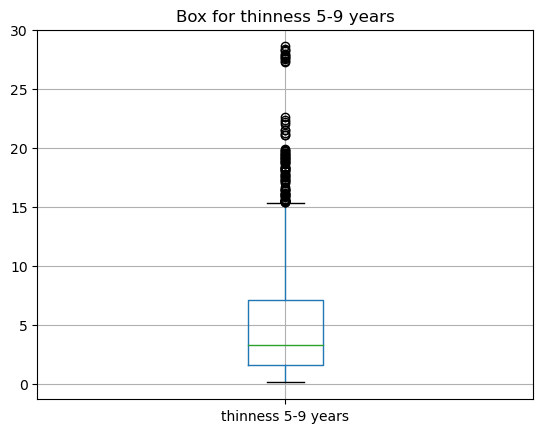

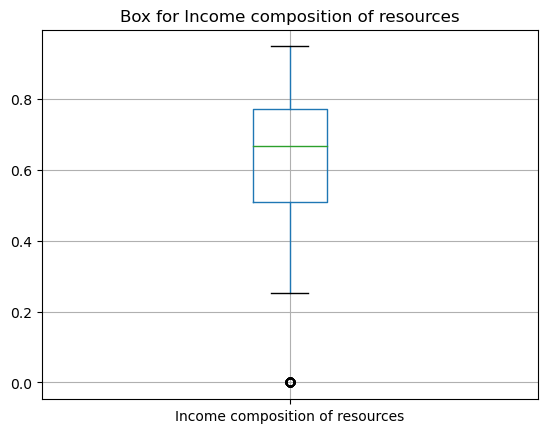

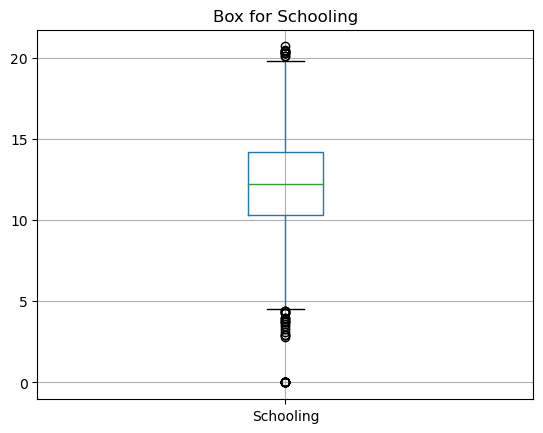

In [193]:
import matplotlib.pyplot as plt
for column in train.columns:
    if train[column].dtype in [int, float]:
        plt.figure()
        train.boxplot(column=column)
        plt.title(f"Box for {column}")
        plt.show

In [194]:
train.describe()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2.350000e+03,2350.000000,2350.000000,2350.000000,2350.000000
mean,95.365532,2007.537447,0.176596,69.275404,165.824082,28.793191,4.593271,720.521353,81.141811,2318.703404,38.556780,40.094468,82.693921,5.936185,82.376712,1.787064,7384.623471,1.192254e+07,4.800215,4.838269,0.631084,12.028140
std,55.753254,4.611986,0.381407,9.573065,125.060094,111.836006,3.896770,1952.616462,22.381998,11589.618520,19.958157,152.939537,23.293600,2.408747,23.722431,5.266324,13106.537701,4.841177e+07,4.378204,4.457052,0.201702,3.253567
min,0.000000,2000.000000,0.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.400000,0.000000,3.000000,0.650000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,47.000000,2004.000000,0.000000,63.300000,74.000000,0.000000,1.100000,5.491010,81.141811,0.000000,19.600000,0.000000,78.000000,4.372500,78.000000,0.100000,564.088121,3.949550e+05,1.600000,1.600000,0.509000,10.300000
50%,94.000000,2008.000000,0.000000,72.200000,144.000000,3.000000,4.160000,65.611455,87.000000,16.000000,43.500000,4.000000,93.000000,5.936185,93.000000,0.100000,3054.363603,3.746860e+06,3.300000,3.300000,0.668000,12.200000
75%,145.000000,2012.000000,0.000000,75.700000,227.000000,20.750000,7.327500,441.534144,96.000000,356.250000,56.100000,26.000000,97.000000,7.340000,97.000000,0.800000,7384.623471,1.192254e+07,7.075000,7.100000,0.773000,14.200000
max,190.000000,2015.000000,1.000000,89.000000,723.000000,1800.000000,17.310000,19099.045060,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.240000,99.000000,50.600000,115761.577000,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [195]:
test.describe()

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,5.880000e+02,588.00000,588.000000,588.000000,588.000000
mean,86.637755,2007.443878,0.164966,160.689420,36.341837,4.640942,809.110761,80.128692,2822.804422,37.379518,49.794218,81.974271,5.946124,82.113208,1.562415,7890.504183,1.612449e+07,4.99759,4.998451,0.613348,11.851083
std,52.081770,4.624420,0.371466,120.101033,139.587066,3.996495,2123.408651,23.393062,10964.956359,19.794607,187.414890,23.595925,2.368121,23.326821,4.240632,13261.877390,7.141911e+07,4.45952,4.585454,0.216468,3.306466
min,0.000000,2000.000000,0.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,1.000000,0.000000,3.000000,0.370000,3.000000,0.100000,3.685949,3.600000e+01,0.10000,0.100000,0.000000,0.000000
25%,40.000000,2003.000000,0.000000,69.000000,0.000000,1.027500,2.717652,80.128692,0.000000,18.975000,0.000000,77.000000,4.347500,77.750000,0.100000,611.124631,4.732078e+05,1.60000,1.600000,0.491750,10.100000
50%,84.000000,2007.000000,0.000000,141.000000,3.000000,4.110000,62.695106,86.000000,17.500000,40.500000,4.000000,93.000000,5.946124,92.500000,0.100000,3193.657230,3.451434e+06,3.60000,3.500000,0.640500,11.900000
75%,133.000000,2011.000000,0.000000,227.250000,26.250000,7.725000,432.321465,96.000000,372.750000,55.825000,36.250000,97.000000,7.300000,97.000000,0.800000,7890.504183,1.612449e+07,7.50000,7.400000,0.770250,14.000000
max,179.000000,2015.000000,1.000000,715.000000,1800.000000,17.870000,19479.911610,99.000000,131441.000000,79.300000,2400.000000,99.000000,17.600000,99.000000,43.500000,119172.741800,1.161978e+09,27.50000,28.500000,0.942000,20.600000


<Axes: xlabel='GDP'>

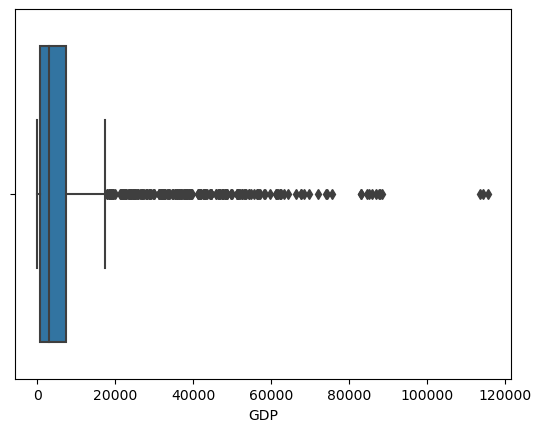

In [196]:
sns.boxplot(x=train["GDP"])

In [197]:
np.percentile(train.GDP,[99])

array([62337.138202])

In [198]:
np.percentile(test.GDP,[99])

array([57885.7382125])

In [199]:
np.percentile(train.Population,[99])

array([1.43672106e+08])

In [200]:
np.percentile(test.Population,[99])

array([1.7197312e+08])

In [201]:
(train.columns)

Index(['ID', 'Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [202]:
percentile_value = 99
thinness_percentile = np.percentile(train["thinness  1-19 years"], percentile_value)

print(f"The {percentile_value}th percentile of 'thinness  1-19 years' is: {thinness_percentile}")

The 99th percentile of 'thinness  1-19 years' is: 19.450999999999976


In [203]:
np.percentile(train['thinness  1-19 years'],[99])[0]

19.450999999999976

In [204]:
np.percentile(train['thinness 5-9 years'],[99])[0]

19.7

In [205]:
np.percentile(train['thinness 5-9 years'],[99])[0]

19.7

In [206]:
uv = np.percentile(train.GDP,[99])[0]

In [207]:
uv = np.percentile(test.GDP,[99])[0]

In [208]:
uv = np.percentile(train.Population,[99])[0]

In [209]:
uv = np.percentile(test.Population,[99])[0]

In [210]:
uv = np.percentile(train['thinness  1-19 years'],[99])[0]

In [211]:
uv = np.percentile(test['thinness  1-19 years'],[99])[0]

In [212]:
uv = np.percentile(train['thinness 5-9 years'],[99])[0]

In [213]:
uv = np.percentile(test['thinness 5-9 years'],[99])[0]

In [214]:
train[(train.GDP>uv)]

,ID,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Af04604195,0,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
1,Af04794049,0,2000,0,54.8,321.0,88,0.01,10.424960,62.0,6532,12.2,122,24.0,8.20,24.0,0.1,114.560000,293756.0,2.3,2.5,0.338,5.5
2,Af07527693,0,2006,0,57.3,295.0,84,0.03,17.171518,64.0,1990,14.7,116,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1
3,Af11267444,0,2010,0,58.8,279.0,74,0.01,79.679367,66.0,1989,16.7,102,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
4,Af12688448,0,2005,0,57.3,291.0,85,0.02,1.388648,66.0,1296,14.2,118,58.0,8.70,58.0,0.1,25.294130,257798.0,19.3,19.5,0.396,7.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2345,Zi60983885,190,2001,0,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2346,Zi76730588,190,2002,0,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2347,Zi85678827,190,2010,0,52.4,527.0,29,5.21,53.308581,9.0,9696,29.4,44,89.0,5.37,89.0,15.7,713.635620,1486317.0,7.1,7.0,0.436,10.0
2348,Zi92845788,190,2004,0,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2


In [215]:
test[(test.GDP>uv)]

,ID,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Sy75324907,155,2006,0,123.0,8,0.970000,122.652333,83.000000,517,48.5,10,83.0,3.780000,8.0,0.1,1762.246170,1.891498e+07,6.4,6.3,0.636,11.4
1,Cr10129453,37,2006,1,113.0,0,11.830000,1555.651986,80.128692,1,58.1,0,96.0,6.950000,96.0,0.1,11363.418450,4.440000e+02,1.8,1.8,0.783,13.9
2,Mo67025598,105,2007,0,125.0,0,4.980000,678.518894,9.000000,0,57.2,0,92.0,6.740000,92.0,0.1,5957.145693,6.158750e+05,2.1,2.2,0.762,13.6
3,Ba38246112,11,2014,0,7.0,0,1.570000,367.255674,98.000000,46,62.9,0,98.0,4.980000,98.0,0.1,24983.379200,1.612449e+07,6.1,6.0,0.820,14.5
4,Ke57254548,82,2000,0,428.0,77,1.510000,0.681686,80.128692,21002,14.4,121,8.0,4.680000,82.0,18.1,43.979713,3.145483e+06,9.2,9.1,0.448,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,Er45192497,51,2006,0,336.0,7,0.970000,10.602698,94.000000,128,14.3,9,94.0,3.300000,94.0,1.4,297.828588,4.666480e+05,9.3,9.3,0.405,5.3
584,Ku93355698,84,2004,0,91.0,0,0.020000,1731.073528,94.000000,23,65.9,1,98.0,2.760000,98.0,0.1,26921.827800,1.612449e+07,3.2,3.0,0.791,14.4
585,Ga05928248,58,2015,0,262.0,3,4.640942,0.000000,97.000000,71,27.3,5,96.0,5.946124,97.0,1.7,7890.504183,1.612449e+07,7.3,7.2,0.450,8.9
586,Tr40253994,162,2006,0,188.0,0,6.350000,103.371069,89.000000,0,38.4,0,89.0,4.490000,92.0,0.6,1495.963370,1.331440e+05,6.2,6.6,0.751,12.3


In [216]:
train[(train.Population>uv)]

,ID,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Af04604195,0,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
1,Af04794049,0,2000,0,54.8,321.0,88,0.01,10.424960,62.0,6532,12.2,122,24.0,8.20,24.0,0.1,114.560000,293756.0,2.3,2.5,0.338,5.5
2,Af07527693,0,2006,0,57.3,295.0,84,0.03,17.171518,64.0,1990,14.7,116,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1
3,Af11267444,0,2010,0,58.8,279.0,74,0.01,79.679367,66.0,1989,16.7,102,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
4,Af12688448,0,2005,0,57.3,291.0,85,0.02,1.388648,66.0,1296,14.2,118,58.0,8.70,58.0,0.1,25.294130,257798.0,19.3,19.5,0.396,7.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2345,Zi60983885,190,2001,0,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2346,Zi76730588,190,2002,0,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2347,Zi85678827,190,2010,0,52.4,527.0,29,5.21,53.308581,9.0,9696,29.4,44,89.0,5.37,89.0,15.7,713.635620,1486317.0,7.1,7.0,0.436,10.0
2348,Zi92845788,190,2004,0,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2


In [217]:
test[(test.Population>uv)]

,ID,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Sy75324907,155,2006,0,123.0,8,0.970000,122.652333,83.000000,517,48.5,10,83.0,3.780000,8.0,0.1,1762.246170,1.891498e+07,6.4,6.3,0.636,11.4
1,Cr10129453,37,2006,1,113.0,0,11.830000,1555.651986,80.128692,1,58.1,0,96.0,6.950000,96.0,0.1,11363.418450,4.440000e+02,1.8,1.8,0.783,13.9
2,Mo67025598,105,2007,0,125.0,0,4.980000,678.518894,9.000000,0,57.2,0,92.0,6.740000,92.0,0.1,5957.145693,6.158750e+05,2.1,2.2,0.762,13.6
3,Ba38246112,11,2014,0,7.0,0,1.570000,367.255674,98.000000,46,62.9,0,98.0,4.980000,98.0,0.1,24983.379200,1.612449e+07,6.1,6.0,0.820,14.5
4,Ke57254548,82,2000,0,428.0,77,1.510000,0.681686,80.128692,21002,14.4,121,8.0,4.680000,82.0,18.1,43.979713,3.145483e+06,9.2,9.1,0.448,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,Er45192497,51,2006,0,336.0,7,0.970000,10.602698,94.000000,128,14.3,9,94.0,3.300000,94.0,1.4,297.828588,4.666480e+05,9.3,9.3,0.405,5.3
584,Ku93355698,84,2004,0,91.0,0,0.020000,1731.073528,94.000000,23,65.9,1,98.0,2.760000,98.0,0.1,26921.827800,1.612449e+07,3.2,3.0,0.791,14.4
585,Ga05928248,58,2015,0,262.0,3,4.640942,0.000000,97.000000,71,27.3,5,96.0,5.946124,97.0,1.7,7890.504183,1.612449e+07,7.3,7.2,0.450,8.9
586,Tr40253994,162,2006,0,188.0,0,6.350000,103.371069,89.000000,0,38.4,0,89.0,4.490000,92.0,0.6,1495.963370,1.331440e+05,6.2,6.6,0.751,12.3


In [218]:
train[(train['thinness  1-19 years']>uv)]

,ID,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
942,In04324722,76,2004,0,64.0,214.0,1600,1.200000,27.338009,6.000000,55443,13.0,2100,58.0,4.220000,63.0,0.3,621.318377,1.126136e+09,27.2,28.2,0.518,9.2
944,In09816447,76,2011,0,66.8,193.0,1100,3.000000,64.605901,44.000000,33634,16.4,1500,79.0,4.330000,82.0,0.2,1461.671957,1.247236e+08,26.9,27.7,0.580,10.8
946,In23258207,76,2002,0,63.3,219.0,1700,1.100000,17.812056,81.141811,40044,12.2,2300,58.0,4.400000,59.0,0.3,466.284200,1.898711e+07,27.4,28.4,0.499,8.4
947,In29166267,76,2000,0,62.5,224.0,1800,0.930000,19.266157,81.141811,38835,11.4,2500,57.0,4.260000,58.0,0.3,438.864634,1.535912e+06,27.7,28.6,0.489,8.3
948,In29844654,76,2010,0,66.4,196.0,1200,2.770000,57.733599,38.000000,31458,15.9,1600,76.0,4.280000,79.0,0.2,1345.771530,1.239869e+07,27.0,27.8,0.569,10.4
950,In38201863,76,2003,0,63.7,216.0,1700,1.190000,19.480868,81.141811,47147,12.6,2200,57.0,4.300000,61.0,0.3,541.135228,1.182785e+07,27.3,28.3,0.505,8.6
952,In43970523,76,2015,0,68.3,181.0,910,4.593271,0.000000,87.000000,90387,18.7,1100,86.0,5.936185,87.0,0.2,1613.188780,1.395398e+06,26.7,27.3,0.615,11.6
954,In46387437,76,2014,0,68.0,184.0,957,3.070000,86.521539,79.000000,79563,18.1,1200,84.0,4.690000,85.0,0.2,1573.118890,1.293859e+09,26.8,27.4,0.607,11.6
955,In54901558,76,2013,0,67.6,187.0,1000,3.110000,67.672304,7.000000,13822,17.5,1300,82.0,4.530000,83.0,0.2,1452.195373,1.278562e+08,26.8,27.5,0.599,11.5
956,In66506394,76,2007,0,65.2,26.0,1400,1.590000,5.234770,6.000000,41144,14.4,1900,67.0,4.230000,64.0,0.3,118.166373,1.179681e+09,27.1,28.0,0.546,9.9


In [219]:
test[(test['thinness  1-19 years']>uv)]

,ID,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
113,In96054246,71,2009,0,2.0,1300,2.50,0.844186,37.000000,56188,15.4,1700,73.0,4.38,74.0,0.2,19.317765,1.214271e+08,27.0,27.8,0.563,10.5
114,In66095571,71,2005,0,211.0,1500,1.27,3.509637,8.000000,36711,13.5,2000,65.0,4.28,65.0,0.3,77.819000,1.144119e+09,27.2,28.1,0.526,9.4
395,In69431309,71,2006,0,28.0,1500,1.37,34.859427,6.000000,64185,13.9,2000,66.0,4.25,65.0,0.3,792.259698,1.161978e+09,27.1,28.0,0.536,9.7
416,In85768966,71,2001,0,222.0,1800,1.00,19.003406,80.128692,51780,11.8,2400,58.0,4.50,59.0,0.3,447.138966,1.714779e+08,27.5,28.5,0.494,8.3
495,Pa94629042,118,2004,0,183.0,364,0.01,28.983231,65.000000,4248,18.4,461,65.0,2.56,65.0,0.1,649.848233,1.578300e+04,21.4,21.8,0.474,5.6


In [220]:
train[(train['thinness 5-9 years']>uv)]

,ID,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
175,Ba99699044,12,2000,0,65.3,173.0,231,0.010000,3.696331,81.141811,5098,1.4,316,83.0,2.330000,82.0,0.1,45.633710,1.315812e+08,2.9,21.5,0.459,7.3
942,In04324722,76,2004,0,64.0,214.0,1600,1.200000,27.338009,6.000000,55443,13.0,2100,58.0,4.220000,63.0,0.3,621.318377,1.126136e+09,27.2,28.2,0.518,9.2
944,In09816447,76,2011,0,66.8,193.0,1100,3.000000,64.605901,44.000000,33634,16.4,1500,79.0,4.330000,82.0,0.2,1461.671957,1.247236e+08,26.9,27.7,0.580,10.8
946,In23258207,76,2002,0,63.3,219.0,1700,1.100000,17.812056,81.141811,40044,12.2,2300,58.0,4.400000,59.0,0.3,466.284200,1.898711e+07,27.4,28.4,0.499,8.4
947,In29166267,76,2000,0,62.5,224.0,1800,0.930000,19.266157,81.141811,38835,11.4,2500,57.0,4.260000,58.0,0.3,438.864634,1.535912e+06,27.7,28.6,0.489,8.3
948,In29844654,76,2010,0,66.4,196.0,1200,2.770000,57.733599,38.000000,31458,15.9,1600,76.0,4.280000,79.0,0.2,1345.771530,1.239869e+07,27.0,27.8,0.569,10.4
950,In38201863,76,2003,0,63.7,216.0,1700,1.190000,19.480868,81.141811,47147,12.6,2200,57.0,4.300000,61.0,0.3,541.135228,1.182785e+07,27.3,28.3,0.505,8.6
952,In43970523,76,2015,0,68.3,181.0,910,4.593271,0.000000,87.000000,90387,18.7,1100,86.0,5.936185,87.0,0.2,1613.188780,1.395398e+06,26.7,27.3,0.615,11.6
954,In46387437,76,2014,0,68.0,184.0,957,3.070000,86.521539,79.000000,79563,18.1,1200,84.0,4.690000,85.0,0.2,1573.118890,1.293859e+09,26.8,27.4,0.607,11.6
955,In54901558,76,2013,0,67.6,187.0,1000,3.110000,67.672304,7.000000,13822,17.5,1300,82.0,4.530000,83.0,0.2,1452.195373,1.278562e+08,26.8,27.5,0.599,11.5


In [221]:
test[(test['thinness 5-9 years']>uv)]

,ID,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
113,In96054246,71,2009,0,2.0,1300,2.50,0.844186,37.000000,56188,15.4,1700,73.0,4.38,74.0,0.2,19.317765,1.214271e+08,27.0,27.8,0.563,10.5
114,In66095571,71,2005,0,211.0,1500,1.27,3.509637,8.000000,36711,13.5,2000,65.0,4.28,65.0,0.3,77.819000,1.144119e+09,27.2,28.1,0.526,9.4
292,Pa81679782,118,2005,0,2.0,364,0.04,30.593208,7.000000,2981,18.9,459,78.0,2.91,77.0,0.1,711.469946,1.539967e+07,21.2,21.7,0.487,6.1
395,In69431309,71,2006,0,28.0,1500,1.37,34.859427,6.000000,64185,13.9,2000,66.0,4.25,65.0,0.3,792.259698,1.161978e+09,27.1,28.0,0.536,9.7
416,In85768966,71,2001,0,222.0,1800,1.00,19.003406,80.128692,51780,11.8,2400,58.0,4.50,59.0,0.3,447.138966,1.714779e+08,27.5,28.5,0.494,8.3
495,Pa94629042,118,2004,0,183.0,364,0.01,28.983231,65.000000,4248,18.4,461,65.0,2.56,65.0,0.1,649.848233,1.578300e+04,21.4,21.8,0.474,5.6


In [222]:
train.GDP[(train.GDP> 3*uv)] = 3*uv

C:\Users\HP ELITEBOOK 840 G5\AppData\Local\Temp\ipykernel_20624\206411302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.GDP[(train.GDP> 3*uv)] = 3*uv


In [223]:
test.GDP[(test.GDP> 3*uv)] = 3*uv

C:\Users\HP ELITEBOOK 840 G5\AppData\Local\Temp\ipykernel_20624\1377429842.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.GDP[(test.GDP> 3*uv)] = 3*uv


In [224]:
train.Population[(train.Population>3*uv)] = 3*uv

C:\Users\HP ELITEBOOK 840 G5\AppData\Local\Temp\ipykernel_20624\4013995617.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.Population[(train.Population>3*uv)] = 3*uv


In [225]:
test.Population[(test.Population>3*uv)] = 3*uv

C:\Users\HP ELITEBOOK 840 G5\AppData\Local\Temp\ipykernel_20624\2044887583.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.Population[(test.Population>3*uv)] = 3*uv


In [227]:
train.columns

Index(['ID', 'Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [228]:
train['thinness  1-19 years'][(train['thinness  1-19 years']> 3*uv)] = 3*uv

C:\Users\HP ELITEBOOK 840 G5\AppData\Local\Temp\ipykernel_20624\3557936221.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['thinness  1-19 years'][(train['thinness  1-19 years']> 3*uv)] = 3*uv


In [229]:
test['thinness  1-19 years'][(test['thinness  1-19 years']> 3*uv)] = 3*uv

C:\Users\HP ELITEBOOK 840 G5\AppData\Local\Temp\ipykernel_20624\3645146381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['thinness  1-19 years'][(test['thinness  1-19 years']> 3*uv)] = 3*uv


In [230]:
train['thinness 5-9 years'][(train['thinness 5-9 years']> 3*uv)] = 3*uv

C:\Users\HP ELITEBOOK 840 G5\AppData\Local\Temp\ipykernel_20624\1282426304.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['thinness 5-9 years'][(train['thinness 5-9 years']> 3*uv)] = 3*uv


In [231]:
test['thinness 5-9 years'][(test['thinness 5-9 years']> 3*uv)] = 3*uv

C:\Users\HP ELITEBOOK 840 G5\AppData\Local\Temp\ipykernel_20624\4172026451.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['thinness 5-9 years'][(test['thinness 5-9 years']> 3*uv)] = 3*uv


In [232]:
## check for all columnns:
from scipy.stats import skew

train = pd.DataFrame(train)
train[train.columns] = train[train.columns].apply(pd.to_numeric, errors='coerce')

#skewness_results = train.apply(skew)
skewness_results={}
for column in train.columns:
    skewness_results[column] = train[column].skew()
    
print("skewness for each column:", skewness_results)

skewness for each column: {'ID': nan, 'Country': 0.002564164071840951, 'Year': -0.011045623766651512, 'Status': 1.6972913654465491, 'Life expectancy': -0.6618799474369444, 'Adult Mortality': 1.218376745477988, 'infant deaths': 9.925276935031041, 'Alcohol': 0.61645823425372, 'percentage expenditure': 4.749119081910268, 'Hepatitis B': -2.1671543948592458, 'Measles': 10.02621700229464, 'BMI': -0.23732084780097765, 'under-five deaths': 9.59675246410807, 'Polio': -2.1139523073532227, 'Total expenditure': 0.6529568900702688, 'Diphtheria': -2.087118377577452, 'HIV/AIDS': 5.356099424662294, 'GDP': -6.563985400830609, 'Population': -28.993586642814705, 'thinness  1-19 years': 1.7258169926189029, 'thinness 5-9 years': 1.7797245059063858, 'Income composition of resources': -1.1818259601899026, 'Schooling': -0.6059358902389733}


In [233]:
from scipy.stats import skew

test = pd.DataFrame(test)
test[test.columns] = test[test.columns].apply(pd.to_numeric, errors='coerce')

#skewness_results = train.apply(skew)
skewness_results={}
for column in test.columns:
    skewness_results[column] = test[column].skew()
    
print("skewness for each column:", skewness_results)

skewness for each column: {'ID': nan, 'Country': 0.0796196066322345, 'Year': 0.012227319441683792, 'Status': 1.8100047153413923, 'Adult Mortality': 0.9805425045681655, 'infant deaths': 9.08163128966675, 'Alcohol': 0.5861037317655616, 'percentage expenditure': 4.319805382121722, 'Hepatitis B': -2.0520854036498997, 'Measles': 6.6951867780927925, 'BMI': -0.1556738286959063, 'under-five deaths': 8.92479025699775, 'Polio': -2.0750974055323828, 'Total expenditure': 0.6076672831248059, 'Diphtheria': -2.05306871496337, 'HIV/AIDS': 5.25406625540121, 'GDP': -5.418031167237004, 'Population': -24.24871130596429, 'thinness  1-19 years': 1.7087491948698617, 'thinness 5-9 years': 1.818347597769771, 'Income composition of resources': -1.1422758265650172, 'Schooling': -0.6720753265094885}


In [234]:
#using the Interquantile range method:
def cal_threshold(data, multiplier=1.5):
    #calculating the first and third quartiles:
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    #calculating the interquartile range:
    iqr = Q3-Q1
    #calculating the flooring and capping threshold:
    cap_threshold = Q3-(multiplier * iqr)
    
    return cap_threshold

def apply_cap(data,cap_threshold):
    #applying to the data:
    return np.where(data>cap_threshold, cap_threshold, data)

GDP = train["GDP"]
Population = train['Population']

#calculating the flooring and capping threshold for gdp and poulation:
GDP_cap_threshold = cal_threshold(GDP)
Population_cap_threshold = cal_threshold(Population)

#applying the flooring and capping acquired to respective columns:
train["GDP"] = apply_cap(GDP, GDP_cap_threshold)
train["Population"] = apply_cap(Population, Population_cap_threshold)

<Axes: >

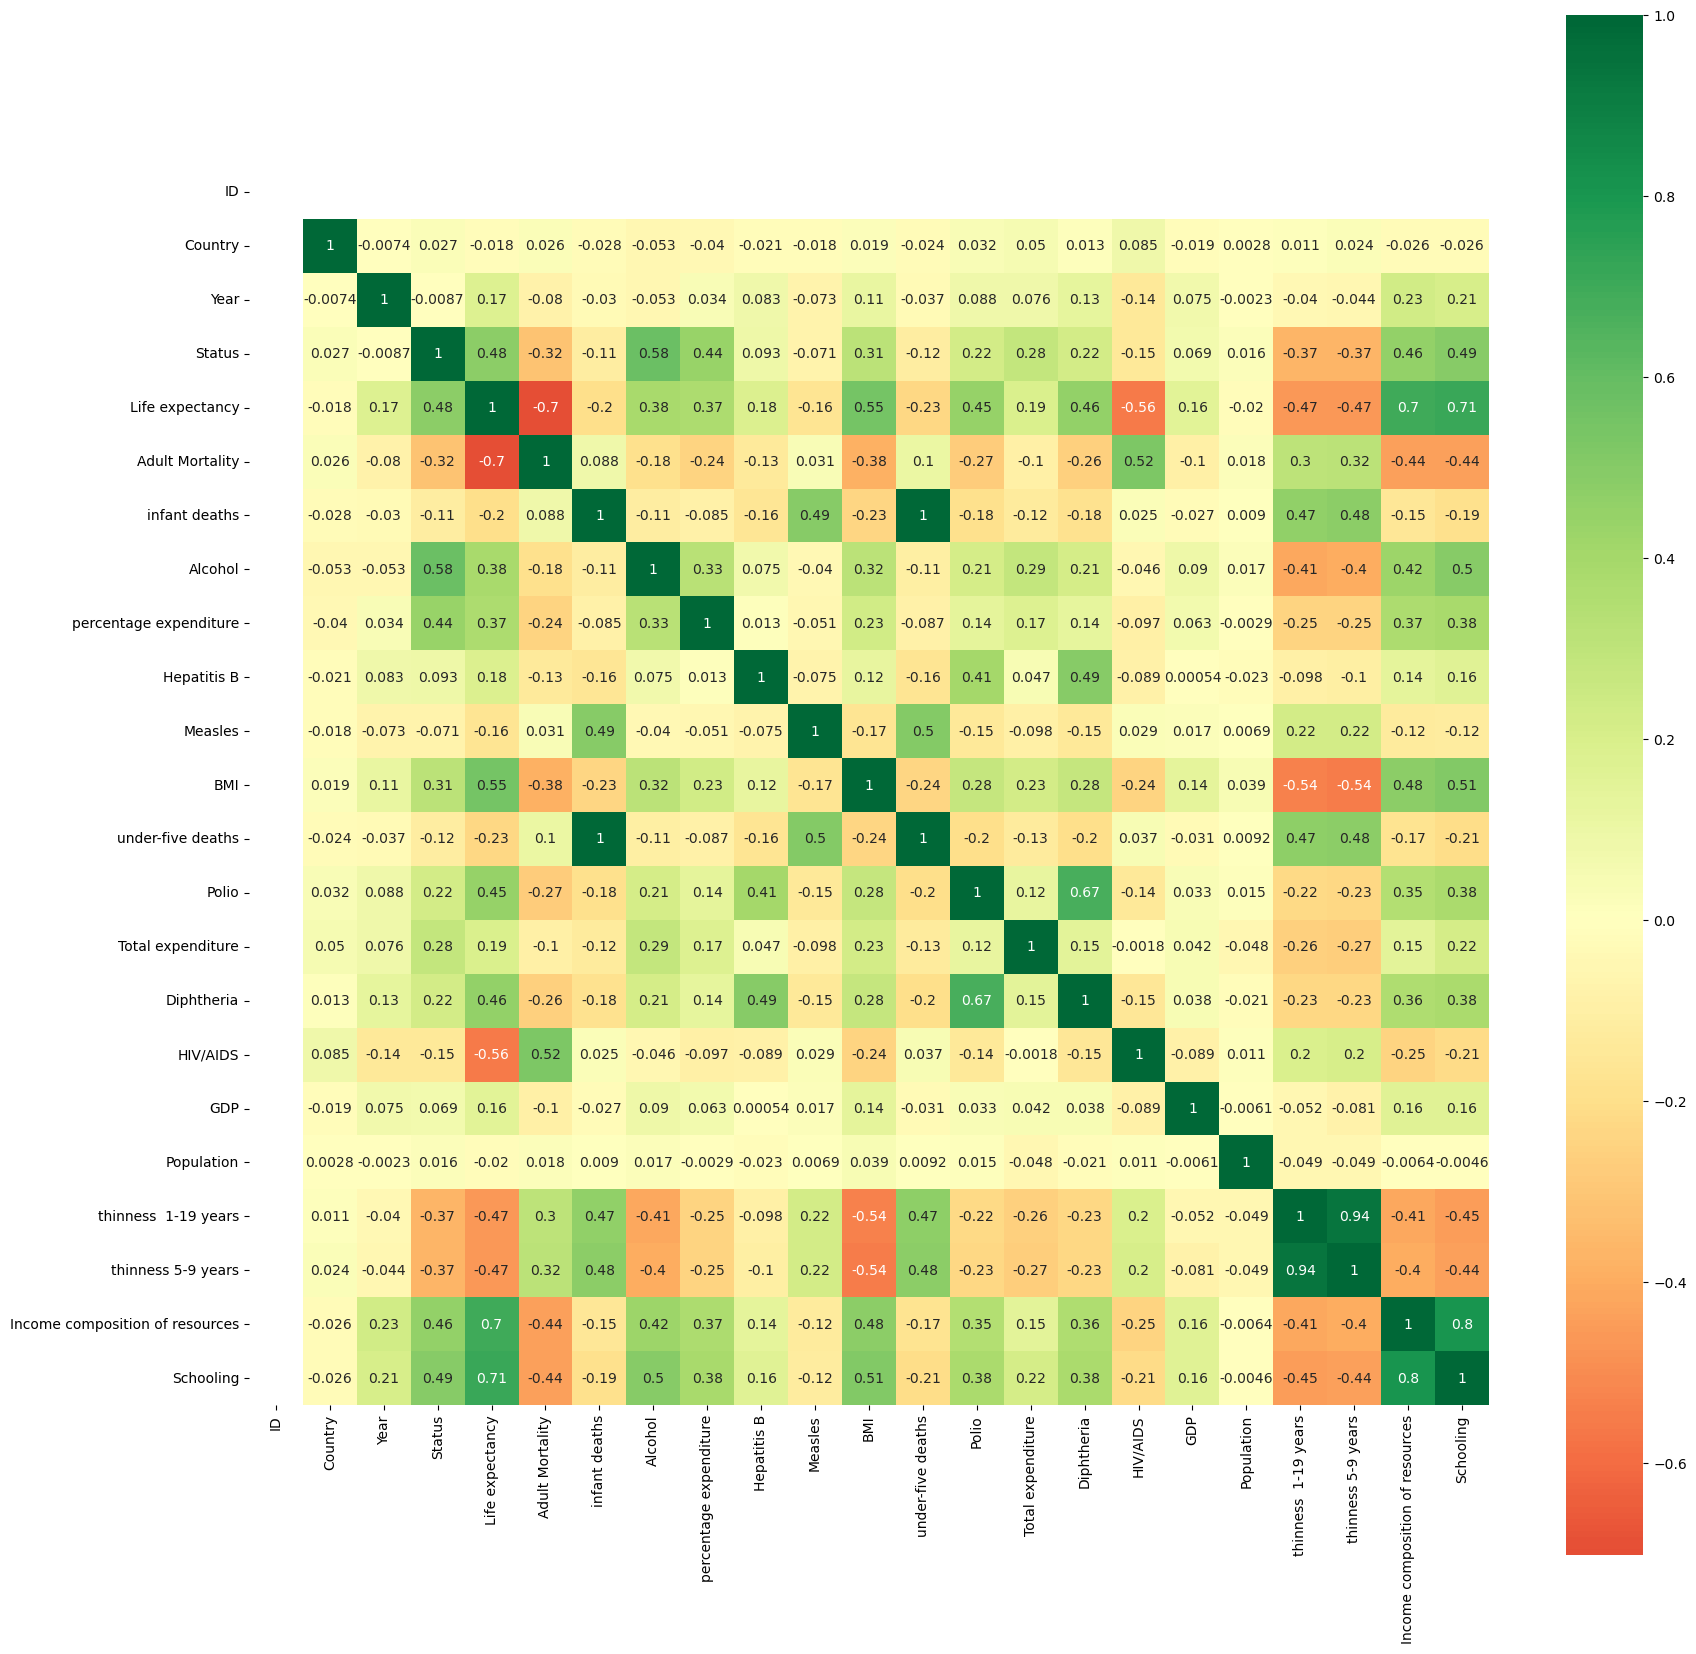

In [235]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sns.heatmap(train.corr(), annot=True, cmap= 'RdYlGn', center=0,square=True)

In [236]:
train['avg_thinness'] = (train["thinness  1-19 years"] + train["thinness 5-9 years"])/2

In [237]:
train = train.drop('thinness  1-19 years', axis=1)
train = train.drop("thinness 5-9 years", axis=1)
train = train.drop("Income composition of resources", axis=1)

In [238]:
train['deaths'] = (train["infant deaths"] + train["under-five deaths"])/2

In [239]:
train.columns

Index(['ID', 'Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Schooling',
       'avg_thinness', 'deaths'],
      dtype='object')

In [240]:
test = test.drop('infant deaths', axis=1)
test = test.drop("under-five deaths", axis=1)

<Axes: >

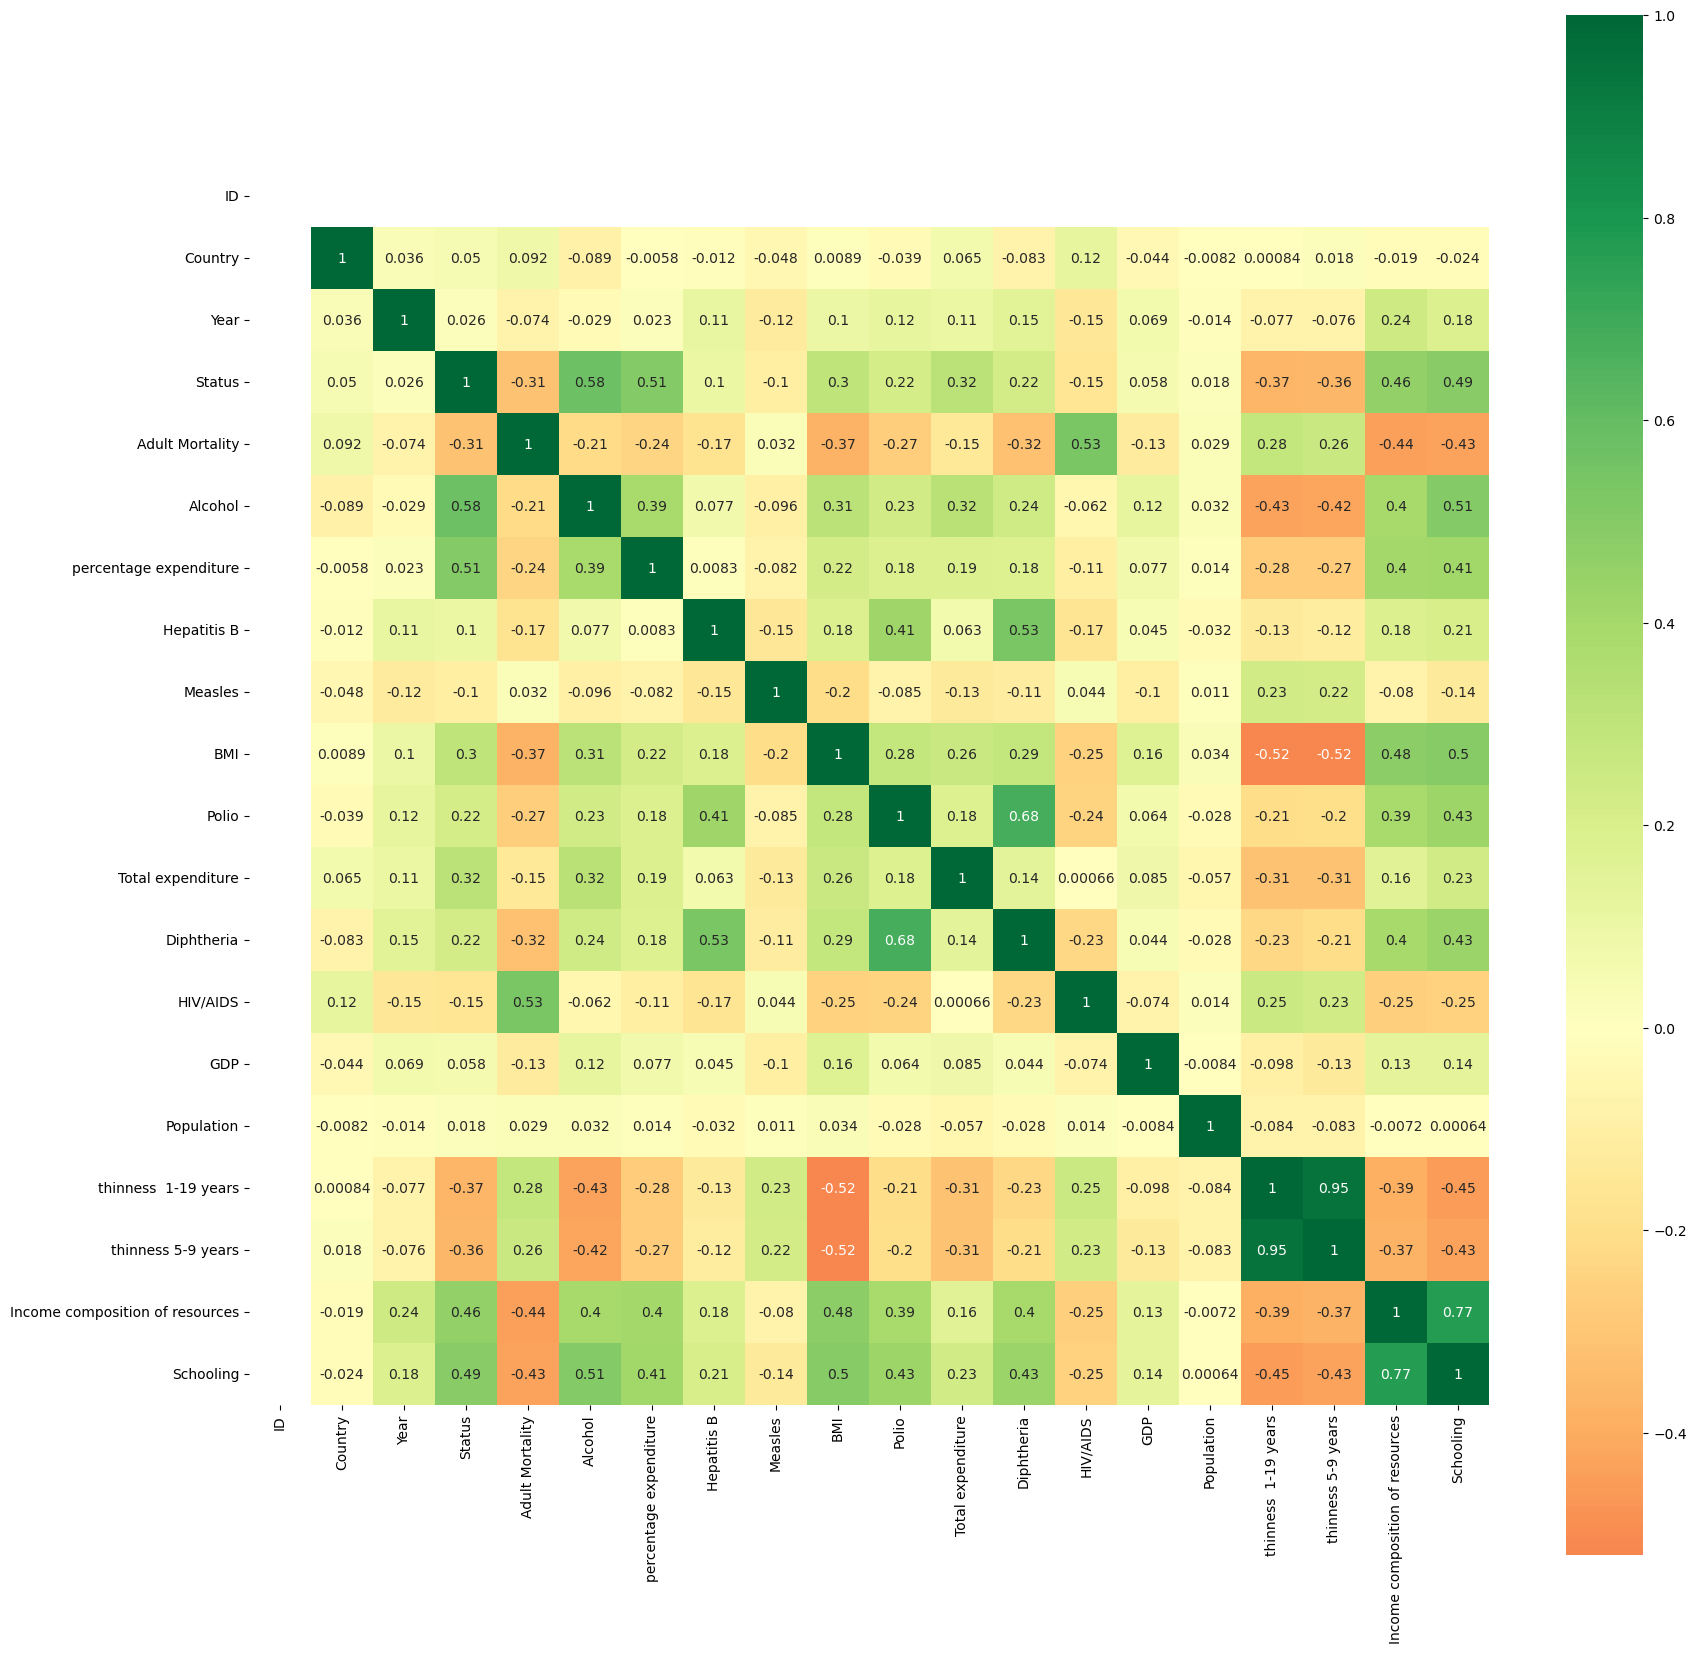

In [241]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sns.heatmap(test.corr(), annot=True, cmap= 'RdYlGn', center=0,square=True)

In [242]:
from sklearn.model_selection import train_test_split

x = train.drop(['ID','Life expectancy'], axis=1)
y = train['Life expectancy']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.2, random_state=42)

In [243]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

In [244]:
reg.fit(x_train, y_train)

LinearRegression()

In [245]:
y_pred = reg.predict(x_train)

In [246]:
y_p_test = reg.predict(x_test)

In [247]:
from sklearn.metrics import r2_score, confusion_matrix, accuracy_score, mean_squared_error

r2_score(y_train, y_pred)

0.81058630827778

In [248]:
r2_score(y_test, y_p_test)

0.8050476199248984

In [249]:
rmse=np.sqrt(mean_squared_error(y_train, y_pred))

print(rmse)

4.192707633271254


In [250]:
rmse=np.sqrt(mean_squared_error(y_test, y_p_test))

print(rmse)

4.113513558616383


In [251]:
from sklearn.tree import DecisionTreeRegressor

TreeModel= DecisionTreeRegressor()

In [252]:
TreeModel.fit(x_train, y_train)

DecisionTreeRegressor()

In [253]:
y_pred = TreeModel.predict(x_train)

In [254]:
y_p_test = TreeModel.predict(x_test)

In [255]:
r2_score(y_train, y_pred)

1.0

In [256]:
r2_score(y_test, y_p_test)

0.9372116845449777

In [257]:
rmse=np.sqrt(mean_squared_error(y_train, y_pred))

print(rmse)

0.0


In [258]:
rmse=np.sqrt(mean_squared_error(y_train, y_pred))

print(rmse)

0.0


In [262]:
sample = pd.read_csv("sample_submission.csv")

In [269]:
sample.head()

,ID,Life expectancy
0,Sy75324907,0
1,Cr10129453,0
2,Mo67025598,0
3,Ba38246112,0
4,Ke57254548,0


In [290]:
out = reg.predict(test.drop('ID', axis= 1))

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Income composition of resources
- thinness  1-19 years
- thinness 5-9 years
Feature names seen at fit time, yet now missing:
- avg_thinness
- deaths
- infant deaths
- under-five deaths


In [272]:
train_without_id = train.drop('ID', axis=1)

In [275]:
test_without_id = test.drop('ID', axis=1)

In [280]:
train.columns

Index(['ID', 'Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Schooling',
       'avg_thinness', 'deaths'],
      dtype='object')

In [281]:
train_without_id = train.drop('Life expectancy', axis=1)

In [286]:
sample.describe()

,Life expectancy
count,588.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [289]:
sample.to_csv("submission.csv002", index=False)